In [1]:
import tensorflow as tf

import numpy as np

import cv2

import scipy

from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
import numpy as np
seed = 7
np.random.seed(seed)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
sess = tf.Session()

In [6]:
a=np.array([[1,2,3,7],[4,5,6,8]])

In [7]:
np.insert(a , 0 , 0 , axis=1)

array([[0, 1, 2, 3, 7],
       [0, 4, 5, 6, 8]])

In [5]:
a=[1,6,3,4,5,6]

In [12]:
a=np.array([[[1,2],[3,4]] , [[5,6],[3,4]] ])

In [14]:
a

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [3, 4]]])

In [15]:
a[:,:,0]-1

array([[0, 2],
       [4, 2]])

In [16]:
a[:,:,0]

array([[1, 3],
       [5, 3]])

In [1]:
if not None:
    print(2)

2


In [3]:
with tf.Session() as sess:
    print( sess.run(tf.constant([[0,0] , [0,6] , [0,6] ,[0,0]])) )

[[0 0]
 [0 6]
 [0 6]
 [0 0]]


In [19]:
a=np.array([[1,2],[2,3],[3,4]])
np.random.shuffle(a)

In [20]:
a[[2,0,1]]


array([[1, 2],
       [3, 4],
       [2, 3]])

In [16]:
np.random.randint(0,10,10)

array([5, 0, 5, 1, 9, 7, 8, 2, 4, 7])

In [18]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
loo=2
for i in range(22):
    loo=i

print(loo)

21


In [2]:
for i in range(2,2):
    print(i)

In [27]:
a=tf.Variable(np.array([[0.,1.,0.,0.],[0.,0.,0.,1.] ]))
b=tf.Variable(np.array([[0.1,0.2,0.6,0.1],[0.1,0.1,0.1,0.7] ]))

#result = -tf.reduce_sum(a*tf.log(tf.nn.softmax(b) ) )
result = -tf.reduce_sum(a*tf.log(b ) )

mean_result = tf.reduce_mean(result)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print(sess.run( (result , mean_result) ))
    print(sess.run(tf.nn.softmax_cross_entropy_with_logits_v2(labels=a , logits=b)))

(1.9661128563728327, 1.9661128563728327)
[1.45896369 0.97321342]


In [20]:
a=tf.Variable(np.array([[0.,1.,0.,0.],[0.,0.,0.,1.] ]))

d=tf.tile(a , multiples=[1,4])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(d))

[[0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.]]


In [25]:
a=tf.Variable(np.array([[[0.,1.,0.,0.],[0.,0.,0.,1.] ]]))
b=tf.Variable(np.array([[0.1,0.2,0.6,0.1],[0.1,0.1,0.1,0.7] ]))

result = -tf.reduce_sum(b)

mean_result = tf.reduce_mean(b)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print(sess.run( (result , mean_result) ))

(-2.0, 0.25)


In [48]:
'sdd'+'s'

'sdds'

# ============

In [225]:
filenames = ["1.jpg", "2.jpg", '3.jpg']
labels = [0, 1, 2 ]

# 此时dataset中的一个元素是(filename, label)
dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

def mmap(filename , label):
    img_arr = cv2.imread(filename.decode() , cv2.IMREAD_GRAYSCALE)
    
    #image_resize = cv2.resize(img_arr , (224,224))
    
    return img_arr , label , 52

dataset = dataset.map( lambda filename , label : tuple( tf.py_func(mmap , [filename , label] , [tf.uint8 , label.dtype , tf.int32]) ) )

# =============

In [2]:
filenames = ["1.jpg", "2.jpg", '3.jpg']
labels = [0, 1, 2 ]

# 此时dataset中的一个元素是(filename, label)
#dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
dataset = tf.train.slice_input_producer((filenames , labels))

In [3]:
def read_producer(dataset):
    image_file = tf.read_file(dataset[0])
    
    image_data = tf.image.decode_jpeg(image_file , channels=3)
        
    image_resize = tf.image.resize_images(image_data , size=[224,224] )
    
    return image_resize , dataset[1]

In [4]:
x , y = read_producer(dataset)

In [5]:
x_train , y_train = tf.train.batch([x,y] , batch_size=1)

In [6]:
x_train

<tf.Tensor 'batch:0' shape=(1, 224, 224, 3) dtype=float32>

In [ ]:
'''
会卡死
'''
with tf.Session() as sess:
    #xtrain , ytrain = sess.run([x_train , y_train])
    #
    #print(xtrain , ytrain)
    
    #print(sess.run(y_train))
    pass

In [31]:
np.where()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


TypeError: imread() missing 1 required positional argument: 'name'

In [30]:
scipy.version.full_version

'1.2.0'

In [43]:
filenames = ["1.jpg", "2.jpg", '3.jpg']
labels = [0, 1, 2 ]

# 此时dataset中的一个元素是(filename, label)
dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

def mmap(filename , label):
    img_arr = cv2.imread(filename.decode() , cv2.IMREAD_GRAYSCALE)
    
    image_resize = cv2.resize(img_arr , (224,224))
    
    return image_resize , label , 52

dataset = dataset.map( lambda filename , label : tuple( tf.py_func(mmap , [filename , label] , [tf.uint8 , label.dtype , tf.int32]) ) )

In [46]:
batch = dataset.shuffle(buffer_size=1).batch(1).repeat(1) #如果repeat参数为None or -1 则无限循环下去

'''
构建迭代器
'''
iterator = tf.data.Iterator.from_structure(batch.output_types , batch.output_shapes)
init_op = iterator.make_initializer(batch)

'''
获取元素 batch
'''

'''直接用这个get_op构造计算图 是可以的'''

get_op = iterator.get_next() 
'''在这里直接使用get_op构造计算图'''

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(init_op)
    
    for i in range(5):
        print(i)
        try:
            while True:
                print( sess.run(get_op)[1] )
        except tf.errors.OutOfRangeError:
            sess.run(init_op)
        
        

0
[0]
[1]
[2]
1
[0]
[1]
[2]
2
[0]
[1]
[2]
3
[0]
[1]
[2]
4
[0]
[1]
[2]


# ==========
# 构造单元素Dataset map出多个元素

In [74]:
filenames = ["1.jpg", "2.jpg", '3.jpg']

# 此时dataset中的一个元素是(filename)
dataset = tf.data.Dataset.from_tensor_slices((filenames))

def mmap(filename):
    img_arr = cv2.imread(filename.decode() , cv2.IMREAD_GRAYSCALE)
    
    #image_resize = cv2.resize(img_arr , (224,224))
    
    return img_arr , 52

dataset = dataset.map( lambda filename : tuple( tf.py_func(mmap , [filename] , [tf.uint8 , tf.int32]) ) )

In [53]:
batch = dataset.shuffle(buffer_size=1).batch(1).repeat(1) #如果repeat参数为None or -1 则无限循环下去

'''
构建迭代器
'''
iterator = tf.data.Iterator.from_structure(batch.output_types , batch.output_shapes)
init_op = iterator.make_initializer(batch)

'''
获取元素 batch
'''

'''直接用这个get_op构造计算图 是可以的'''

get_op = iterator.get_next() 
'''在这里直接使用get_op构造计算图'''

'在这里直接使用get_op构造计算图'

In [54]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(init_op)
    
    for i in range(5):
        print(i)
        try:
            while True:
                print( sess.run(get_op)[0].shape )
        except tf.errors.OutOfRangeError:
            sess.run(init_op)
        
        

0
(1, 500, 422)
(1, 375, 500)
(1, 375, 500)
1
(1, 500, 422)
(1, 375, 500)
(1, 375, 500)
2
(1, 500, 422)
(1, 375, 500)
(1, 375, 500)
3
(1, 500, 422)
(1, 375, 500)
(1, 375, 500)
4
(1, 500, 422)
(1, 375, 500)
(1, 375, 500)


In [55]:
a=[[1,2,3],[5,6,7]]
b=[[3,4,5],[8,7,6]]

np.concatenate((a,b))


array([[1, 2, 3],
       [5, 6, 7],
       [3, 4, 5],
       [8, 7, 6]])

In [20]:

model = Sequential()
model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(700,900,3),padding='valid',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))




In [21]:
#model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 173, 223, 96)      34944     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 86, 111, 96)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 86, 111, 256)      614656    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 42, 55, 256)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 42, 55, 384)       885120    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 42, 55, 384)       1327488   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 42, 55, 256)       884992    
Total para

In [14]:
model.input_shape

(None, 227, 227, 3)

In [70]:

model = Sequential()
#model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(700,900,3),padding='valid',activation='relu',kernel_initializer='uniform'))

height=200
width=800

p_h = int(np.ceil(height/6))
p_w = int(np.ceil(width/6))
print(p_h , p_w)
stride_height = np.min((p_h , p_w))
stride_width = np.max((p_h , p_w))

model.add(MaxPooling2D(pool_size=(p_h,p_w),strides=(p_h,p_w) , input_shape=(height,width,3) , padding='same'))
#model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
#model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
#model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
#model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))
#model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu',kernel_initializer='uniform'))




34 134


In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_41 (MaxPooling (None, 6, 6, 3)           0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [76]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

(500, 422, 3)


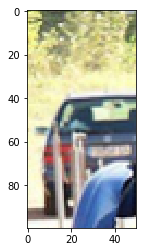

In [83]:
img = plt.imread('1.jpg')

shape = img.shape
print(shape) #height width channel
img = img.reshape([1,shape[0], shape[1], shape[2]])
#[y1 x1 y2 x2]
a = tf.image.crop_and_resize(img,[[0/500 ,0/422 ,100/500 ,50/422]],box_ind=[0],crop_size=(100,50))

with tf.Session() as sess:
    b = sess.run(a)
    
    plt.imshow(b[0]/255)
    plt.imshow(b[0].astype('uint8'))

In [3]:
raw = tf.Variable(tf.random_normal(shape=(3, 2)))
multi = tf.tile(raw, multiples=[3, 1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(raw.eval())
    print('-----------------------------')
    print(sess.run(multi))


[[ 0.42013964  1.0145453 ]
 [-0.38720793 -0.20896645]
 [ 1.2391553   0.65570664]]
-----------------------------
[[ 0.42013964  1.0145453 ]
 [-0.38720793 -0.20896645]
 [ 1.2391553   0.65570664]
 [ 0.42013964  1.0145453 ]
 [-0.38720793 -0.20896645]
 [ 1.2391553   0.65570664]
 [ 0.42013964  1.0145453 ]
 [-0.38720793 -0.20896645]
 [ 1.2391553   0.65570664]]


In [15]:
a=np.array([1,2,3,2])

In [16]:
sorted(-a)

[-3, -2, -2, -1]

In [17]:
np.argsort(-a)

array([2, 1, 3, 0], dtype=int64)

In [8]:
from tensorflow.python.framework import ops

In [4]:
ops.

In [6]:

os.getenv('USERDATA')

In [7]:
np.sum([1,2,3])

6

In [10]:
a=[]

In [12]:
a+=[1,2]

In [13]:
a

[1, 2]

In [14]:
a+=[2,3,4]

In [15]:
a

[1, 2, 2, 3, 4]

In [19]:
 
A = tf.Variable(tf.constant(0.0), dtype=tf.float32)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    print(sess.run(A))
    print(sess.run(tf.assign(A, 10)))
    print( sess.run(A) )


0.0
10.0
10.0


In [21]:
np.prod([4,2,2,3])

48

In [22]:
net_para = np.load('bvlc_alexnet.npy' , encoding='bytes').item()

In [24]:
net_para.keys()

dict_keys(['fc6', 'fc7', 'fc8', 'conv3', 'conv2', 'conv1', 'conv5', 'conv4'])

In [26]:
tf.sysconfig.get_include()

'C:\\Anaconda3\\lib\\site-packages\\tensorflow\\include'

In [ ]:
tf.squared_difference()

In [8]:
a=tf.Variable(initial_value=np.array([[1.,0.],[0.,1.],[1.,0.]]))
b=tf.Variable(initial_value=np.array([[0.2,0.8],[0.7,0.3],[0.1,0.9]]))

In [21]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    kk = a*tf.log(b)
    
    ct = -tf.reduce_sum( a*tf.log(b)  )
    
    loss = tf.reduce_mean(kk)
    
    print( sess.run(kk) )

[[-1.60943791 -0.        ]
 [-0.         -1.2039728 ]
 [-2.30258509 -0.        ]]


In [22]:
1.61+1.20+2.3


5.109999999999999

In [23]:
5.11/6

0.8516666666666667

In [ ]:
-0.8526659682923471